<a href="https://colab.research.google.com/github/tszabad/FCC_dataanalytics/blob/master/fertility_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from IPython.display import clear_output

print(tf.__version__)

2.4.1


In [84]:
dataset_path = "/content/fertility_Diagnosis.txt"
dataset = pd.read_table(dataset_path, sep=",", header=None, names = ["Season", "Age", "Disease", "Accident", "Surgery", "Feaver", "Alcohol_consumption", "Smoking", "Siting", "Output"])
dataset.head()

,Season,Age,Disease,Accident,Surgery,Feaver,Alcohol_consumption,Smoking,Siting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [85]:
dataset.isna().sum()
dataset["Output"] = dataset["Output"].apply(lambda x: 1 if x=='N' else 0 )

In [86]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#sns.pairplot(train_dataset[["Season", "Age", "Disease", "Accident", "Surgery", "Feaver", "Alcohol_consumption", "Smoking", "Siting", "Output"]], diag_kind="kde")

In [87]:
train_labels = train_dataset.pop('Output')
test_labels = test_dataset.pop('Output')

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
  
model = build_model()

In [90]:
EPoCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)

early_history = model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0003,  mae:0.0102,  mse:0.0003,  val_loss:0.2464,  val_mae:0.3129,  val_mse:0.2464,  
....................................................................................................
Epoch: 100, loss:0.0002,  mae:0.0090,  mse:0.0002,  val_loss:0.2550,  val_mae:0.3168,  val_mse:0.2550,  
....................................................................................................
Epoch: 200, loss:0.0015,  mae:0.0344,  mse:0.0015,  val_loss:0.2438,  val_mae:0.3066,  val_mse:0.2438,  
....................................................................................................
Epoch: 300, loss:0.0019,  mae:0.0320,  mse:0.0019,  val_loss:0.2281,  val_mae:0.3009,  val_mse:0.2281,  
....................................................................................................
Epoch: 400, loss:0.0001,  mae:0.0071,  mse:0.0001,  val_loss:0.2429,  val_mae:0.3096,  val_mse:0.2429,  
........................................................................

In [91]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} output".format(mae))

1/1 - 0s - loss: 0.0797 - mae: 0.1521 - mse: 0.0797
Testing set Mean Abs Error:  0.15 output


In [92]:
test_predictions = model.predict(test_dataset).flatten()



In [93]:
test_predictions = pd.Series(test_predictions)
for i in range(20):

  print(test_predictions.iloc[i])
  print(test_labels.iloc[i])

0.9939388
1
0.9309174
1
0.7472839
1
1.0069155
1
1.0274317
1
0.9959697
1
0.9945885
1
1.1117132
1
1.0426655
1
0.99596703
1
0.95502114
1
1.0174724
1
0.745023
1
1.1066084
1
1.011195
0
1.1459227
1
1.0735147
1
1.2380321
1
1.0515572
1
0.43165612
1


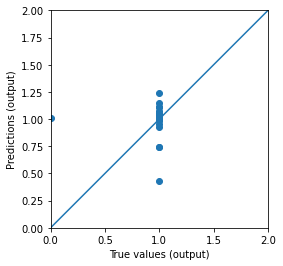

In [94]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (output)')
plt.ylabel('Predictions (output)')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)